<a href="https://colab.research.google.com/github/jjmora22/deep-learning/blob/main/Practica_Deep_Learning_Juan_Jose_de_la_Mora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica de Deep Learning de Juan José de la Mora

Iré explicando paso a paso cada acción y justificaré mis decisiones en pequeños mensajes intermedios. 


## 1. Concentraré en este paso, todas las librerías que voy a usar: 


In [12]:
!pip install scipy==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import numpy as np # Requiero Numpy para el manejo de matrices, álgebra lineal y arreglos
import pandas as pd # Me da acceso a las herramientas para el análisis de datos

import matplotlib.pyplot as plt # Me ayudará con las instrucciones necesarias para hacer gráficos
from matplotlib.colors import ListedColormap # Me cpermite dar colores a las gráficas y mostrar los datos de forma clara
# A partir de esta línea, los gráficos de matplotlib aparecerán directamente después de donde se llame la función plot.
%matplotlib inline 

cm = plt.cm.RdBu # Selección del mapa de color 
cm_bright = ListedColormap(['#FF0000', '#0000FF']) ## Selección del mapa de color 

import warnings # Evitar los warnings 
warnings.filterwarnings('ignore')

import graphviz # Visualización de los árboles de manera gráfica e incluye el cálculo del GINI

from sklearn.model_selection import train_test_split ## Para obtener la muestra para train y para split

##import OneHotEncoder ## Para poder hacer category encoding usando media
##import category_encoders as ce

from sklearn import preprocessing ## Funciones para manipular vectores para representarlos en formas más fáciles de interpretar.
import imageio # Loading images
import tensorflow as tf # Crear y manipular tensores
from sklearn.model_selection import train_test_split # Separar los vectores
from sklearn.preprocessing import StandardScaler # Para preprocesar los datos
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Para estandarizar


from tqdm import tqdm # Visualize advance in repetitive processes 

import tensorflow as tf # Importa Tensor Flow
from tensorflow import keras # Keras es para la generación del modelo 
from tensorflow.keras import layers, models, regularizers, metrics, optimizers
from keras.optimizers import SGD, Adam # Descenso de gradiente y Adam
from keras.models import Sequential #Importo el modelo Secuencial 
from keras.metrics import Accuracy #Para poder evaluar el accuracy en el modelo
from keras.layers import Dense # Importo la capa densa
from sklearn.metrics import classification_report # Para medir la cantidad de predicciones exactas en un algoritmo. 

import glob # Load images 
import cv2 # Manipulate images 

from sklearn.metrics import mean_squared_error #calcular el MSE

# Ahora, para el procesamiento de las imágenes!!!!
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array # Genera lotes de datos de las imágenes 
from tensorflow.keras.utils import to_categorical # Convierte vectores de datos en matrices tipo binario
import os # Para trabajar con los directorios locales 
import urllib.request # Bajar los archivos de las imágenes
from PIL import Image # Cargar imágenes desde archivos en disco
from keras.layers import Input, Add, Dropout, Permute, add, Dense, Concatenate
from keras.utils import plot_model
from scipy.io import loadmat
from matplotlib.pyplot import imread
#from scipy.misc import bytescale
import copy
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input


## 2. Ahora, cargo la información con la que voy a trabajar --> 


In [15]:
!wget -O airbnb-listings-extract.zip https://github.com/jjmora22/deep-learning/raw/d440bb9d7c10235b6b4dfa9e1beaff673c501103/airbnb-listings-extract.zip?raw=true

--2023-02-19 19:43:43--  https://github.com/jjmora22/deep-learning/raw/d440bb9d7c10235b6b4dfa9e1beaff673c501103/airbnb-listings-extract.zip?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jjmora22/deep-learning/d440bb9d7c10235b6b4dfa9e1beaff673c501103/airbnb-listings-extract.zip [following]
--2023-02-19 19:43:43--  https://raw.githubusercontent.com/jjmora22/deep-learning/d440bb9d7c10235b6b4dfa9e1beaff673c501103/airbnb-listings-extract.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15698338 (15M) [application/zip]
Saving to: ‘airbnb-listings-extract.zip’

airbnb-listings-ext 100%[==

In [16]:
!ls -lah

total 15M
drwxr-xr-x 1 root root 4.0K Feb 19 19:43 .
drwxr-xr-x 1 root root 4.0K Feb 19 19:16 ..
-rw-r--r-- 1 root root  15M Feb 19 19:43 airbnb-listings-extract.zip
drwxr-xr-x 4 root root 4.0K Feb 17 19:29 .config
drwxr-xr-x 1 root root 4.0K Feb 17 19:30 sample_data


In [17]:
# lo descomprimimos -->
!unzip airbnb-listings-extract.zip

Archive:  airbnb-listings-extract.zip
  inflating: airbnb-listings-extract.csv  
  inflating: __MACOSX/._airbnb-listings-extract.csv  


In [18]:
# Genero data donde guardo la informaciónA
data = pd.read_table('./airbnb-listings-extract.csv',sep=';', decimal='.', on_bad_lines='skip')
print("El data frame tiene el siguiente shape --> ", data.shape)
print("Voy a visualizar las primeras 5 líneas --> \n", data.head())

El data frame tiene el siguiente shape -->  (14780, 89)
Voy a visualizar las primeras 5 líneas --> 
          ID                            Listing Url       Scrape ID  \
0  11210388  https://www.airbnb.com/rooms/11210388  20170306202425   
1  17471131  https://www.airbnb.com/rooms/17471131  20170407214050   
2  17584891  https://www.airbnb.com/rooms/17584891  20170407214050   
3   5398030   https://www.airbnb.com/rooms/5398030  20170407214050   
4  18104606  https://www.airbnb.com/rooms/18104606  20170407214050   

  Last Scraped                                 Name  \
0   2017-03-07       The Loft-Full Bath-Deck w/View   
1   2017-04-08           Claris I, Friendly Rentals   
2   2017-04-08  Style Terrace Red, Friendly Rentals   
3   2017-04-08    Picasso Suite 1.4 Paseo de Gracia   
4   2017-04-08       Smart City Centre Apartment II   

                                             Summary  \
0  Loft in the Hill country 12-15 minutes directl...   
1  This apartment has: 1 double bed

## 3. Analizo los datos 


Primero veo el nombre de las columnas:


In [19]:
lista_columnas = list(data.columns.values)
print("La lista de los nombres de las columnas es esta --> ", lista_columnas)

La lista de los nombres de las columnas es esta -->  ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Gue

In [20]:
print(data.shape)

(14780, 89)


### 3.1 Voy a validar primero que haya suficiente información. Voy a buscar cuántos NAs hay por columna y en principio, quiero saber cuáles están por encima del 70% de información -- Máximo X% de NAs (que establezco en la variabla max_na)


In [21]:
max_NA = 30

In [22]:
NAs_columns = list()  # Genero una lista para hacer el análisis
columnas_borrar = []
print ("Columna --> Número de NA --> %NAs en total datos ")
for name in lista_columnas:
    print (name, " --> ", data[name].isna().sum(), " --> ", (data[name].isna().sum()*100/data.shape[0]).round(2))
    NA_count = {"Columna": name, 'NA': data[name].isna().sum(), 'NA%': (data[name].isna().sum()*100/data.shape[0]).round(2)}
    if (data[name].isna().sum()*100/data.shape[0]).round(2) > max_NA:
      columnas_borrar.append(name)
    NAs_columns.append(NA_count)


df_NA = pd.DataFrame(NAs_columns) 
print("Las columnas candidatas a ser eliminadas por la cantidad de NA son --> ", columnas_borrar)
print("En total, son ", len(columnas_borrar), "columnas")

Columna --> Número de NA --> %NAs en total datos 
ID  -->  0  -->  0.0
Listing Url  -->  0  -->  0.0
Scrape ID  -->  0  -->  0.0
Last Scraped  -->  0  -->  0.0
Name  -->  1  -->  0.01
Summary  -->  591  -->  4.0
Space  -->  3892  -->  26.33
Description  -->  6  -->  0.04
Experiences Offered  -->  0  -->  0.0
Neighborhood Overview  -->  5646  -->  38.2
Notes  -->  9136  -->  61.81
Transit  -->  5714  -->  38.66
Access  -->  6462  -->  43.72
Interaction  -->  6552  -->  44.33
House Rules  -->  5161  -->  34.92
Thumbnail Url  -->  2820  -->  19.08
Medium Url  -->  2820  -->  19.08
Picture Url  -->  19  -->  0.13
XL Picture Url  -->  2820  -->  19.08
Host ID  -->  0  -->  0.0
Host URL  -->  0  -->  0.0
Host Name  -->  3  -->  0.02
Host Since  -->  3  -->  0.02
Host Location  -->  43  -->  0.29
Host About  -->  5241  -->  35.46
Host Response Time  -->  1899  -->  12.85
Host Response Rate  -->  1899  -->  12.85
Host Acceptance Rate  -->  14741  -->  99.74
Host Thumbnail Url  -->  3  -->  0.0

Al analizar estas columnas, me preocupa la medida de square feet, pues la considero importante para calcular el precio y aporta muy poca información. La eliminaré.

Neighbourhood es otra variable que me preocupa que también considero muy valiosa. Esa se encuentra con el 38% de NAs. Esta está más cercana al 30%, es probable que la mantenga. 

## 3.2 Ahora, voy a analizar en más detalle los datos disponibles -->

Encuentro algunos temas interesantes: 
 - Parece que la mayor parte de la información es de España
 - En principio, parece que hay una mayor cantidad de información sobre Madrid
 - Neighbourhood y Neighourhood cleansed son parecidas y existe más información es cleansed ¿puedo separarlas?
 
Voy a hacer un análsis de "Market" primero, para ver cuántos elementos tengo por cada país.

In [23]:
lista_paises = data['Country'].unique()

print("La lista de los nombres de las paises es esta --> ", lista_paises, "\n \n")

print ("La cantidad de apariciones de cada país es de --> ")

data['Country'].value_counts()
 # Genero un Dataframe para poder manipularlo en el análisis 


La lista de los nombres de las paises es esta -->  ['United States' 'Spain' 'Netherlands' 'Belgium' 'France' nan
 'United Kingdom' 'Ireland' 'Italy' 'Greece' 'Denmark' 'Australia'
 'Germany' 'Austria' 'Canada' 'Switzerland' 'Hong Kong' 'Cuba'] 
 

La cantidad de apariciones de cada país es de --> 


Spain             14001
United States       184
United Kingdom      159
France              110
Italy                68
Australia            46
Ireland              45
Germany              41
Austria              31
Netherlands          26
Canada               20
Belgium              17
Denmark              16
Switzerland           6
Greece                5
Hong Kong             3
Cuba                  1
Name: Country, dtype: int64

Claramente, el país con más participaciones es España.

Concentraré el análisis en España pero, ¿qué ciudades son las que más información aportan?

In [24]:

print ("España muestra los siguientes valores en 'Markets' --> \n",data.loc[data['Country'] == 'Spain', 'Market'].value_counts())
print("\n Además, se encuentran ", data.loc[data['Country'] == 'Spain', 'Market'].isna().sum(), " NAs con lo que se comprueba el total \n")
 # Genero un Dataframe para poder manipularlo en el análisis 
lista_ciudades_eliminar = data[data['Country'] == "Spain"]
lista_ciudades_eliminar = lista_ciudades_eliminar[lista_ciudades_eliminar['Market'] != "Madrid"]
lista_ciudades_eliminar = list(set(lista_ciudades_eliminar['Market']))
print("En total hay ", len(lista_ciudades_eliminar), " (incluyendo los NA) que son ciudades con poca información o equivocadas")
print("La lista de ciudades que se podrían eliminar es la siguiente ", lista_ciudades_eliminar)
lista_ciudades_eliminar
    

España muestra los siguientes valores en 'Markets' --> 
 Madrid                   13272
Mallorca Island            372
Barcelona                  292
Other (International)       12
London                       1
Toledo                       1
Deauville                    1
Name: Market, dtype: int64

 Además, se encuentran  50  NAs con lo que se comprueba el total 

En total hay  7  (incluyendo los NA) que son ciudades con poca información o equivocadas
La lista de ciudades que se podrían eliminar es la siguiente  [nan, 'London', 'Deauville', 'Barcelona', 'Toledo', 'Other (International)', 'Mallorca Island']


[nan,
 'London',
 'Deauville',
 'Barcelona',
 'Toledo',
 'Other (International)',
 'Mallorca Island']

La información parece estar centrada principalmente en Madrid. Veamos los municipios que tiene 'Neighbourhood' que tiene y qué porcentaje de la información puede ser recuperada. 

In [25]:
pd.set_option('display.max_rows', None) ##Voy a imprimir todas las filas 
print ("Madrid muestra los siguientes valores en 'Neighbourhoods' --> \n",data.loc[data['Market'] == 'Madrid', 'Neighbourhood'].value_counts())
df_Neighbourhoods = data.loc[data['Market'] == 'Madrid', 'Neighbourhood'].value_counts()
print("\n Además, se encuentran ", data.loc[data['Market'] == 'Madrid', 'Neighbourhood'].isna().sum(), " NAs con lo que se comprueba el total \n")


Madrid muestra los siguientes valores en 'Neighbourhoods' --> 
 Malasaña               892
La Latina              807
Embajadores            794
Sol                    716
Justicia               556
Cortes                 525
Palacio                390
Aluche                 224
Argüelles              216
Trafalgar              203
Carabanchel            198
Ciudad Lineal          177
Palos do Moguer        170
Goya                   158
Guindalera             134
Puente de Vallecas     123
Arapiles               116
Recoletos              115
Hortaleza              107
Almagro                104
Pacifico               102
Gaztambide              92
Fuencarral-el Pardo     80
Lista                   80
Cuatro Caminos          75
Acacias                 72
San Blas                69
Castellana              68
Usera                   67
Prosperidad             65
Ibiza                   65
Delicias                64
La Chopera              61
Rios Rosas              59
Imperial          

La información parece estar sin errores.

Los 4.563 NAs, representan el 34,4% del total de la información. Es mejor que el 38% que se estimaba para todo el set. 

Parece que la mejor alternativa para generar el modelo, es trabajar esta información para Madrid. 

Voy a validar ahora los Códigos Postales -->


In [26]:
print ("Madrid muestra los siguientes valores en 'Zipcode' --> \n",data.loc[data['Market'] == 'Madrid', 'Zipcode'].value_counts())
df_zipcode = data.loc[data['Market'] == 'Madrid', 'Zipcode'].value_counts()
print("\n Además, se encuentran ", data.loc[data['Market'] == 'Madrid', 'Zipcode'].isna().sum(), " NAs con lo que se comprueba el total \n")
df_zipcode.shape

Madrid muestra los siguientes valores en 'Zipcode' --> 
 28012           2063
28004           1797
28005           1191
28013           1019
28014            602
28015            599
28045            499
28010            384
28008            337
28028            261
28011            251
28001            231
28006            217
28009            216
28007            206
28019            202
28020            195
28003            186
28002            172
28039            160
28025            124
28027            124
28029            112
28017            111
28043            105
28026             93
28042             91
28033             90
28053             85
28038             79
28016             77
28035             76
28030             73
28047             67
28036             66
28037             66
28041             65
28021             61
28050             58
28034             49
28024             44
28018             43
28023             37
28032             33
28046             3

(90,)

Se detectan algunos códigos que hay que corregir: <br>
- Los que inician con '0' no son de Madrid
- Los códigos 46370, 84084,03430, 07320, probablemente no son de Madrid --> Se borrarán
- 28002\n28002 debe reemplazarse por 28002
- 2802\n28012 debe reemplazarse por 28012
- 28051\n28051 debe reemplazarse por 28051
- 280013 debe reemplazarse por 28013
- 28 es un error se elimina
- 08015 parece 28015
- 25008 parece ser 28008
- 2015 y 2805 probablemente son 28015
- 2804 probablemente es 28004
- 28051\n28051 debe reemplazarse por 28051
- 29012 debe ser 28012
- 27013 debe ser 28013
- 20013 debe ser 28013
- 20126 debe ser 28126
- 27004 debe ser 28004
- Hay que eliminar un '-'
- 2815 debe ser 28015
- Madrid 28004 debe ser 28004
- 10100 debe ser 28100
- Pondré toda la columna como int
- Eliminaré todos los NA
     

## 3.3. Estrategia de limpieza de la base de datos: 
a. Antes de dividir en test y train eliminaré los datos que no son de Madrid. <br>
b. Una vez que tenga aislada la información de Madrid, dividiré en train y test. <br>
c. Eliminaré la columna de 'Country', solo estaré trabajando con Madrid. <br>
d. Con excepción de Neighbourhood, eliminaré todas las columnas que tengan más del 30% de información NAs --> <br>'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About', 'Host Acceptance Rate', 'Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Has Availability', 'License', 'Jurisdiction Names'<br>
e. Corregiré los códigos postales de Madrid --> <br>
- Los que inician con '0' no son de Madrid
- Los códigos 46370, 84084,03430, 07320, probablemente no son de Madrid --> Se borrarán
- 28002\n28002 debe reemplazarse por 28002
- 2802\n28012 debe reemplazarse por 28012
- 28051\n28051 debe reemplazarse por 28051
- 280013 debe reemplazarse por 28013
- 28 es un error se elimina
- 08015 parece 28015
- 25008 parece ser 28008
- 2015 y 2805 probablemente son 28015
- 2804 probablemente es 28004
- 28051\n28051 debe reemplazarse por 28051
- 29012 debe ser 28012
- 27013 debe ser 28013
- 20013 debe ser 28013
- 20126 debe ser 28126
- 27004 debe ser 28004
- Hay que eliminar un '-'
- 2815 debe ser 28015
- Madrid 28004 debe ser 28004
- 10100 debe ser 28100
- Pondré toda la columna como int
- Eliminaré todos los NA

f. Mantendré los datos de las imágenes para analizarlos más adelante ('Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url'). 

### 3.3.1. Solo dejo la información de Madrid -->

In [27]:
data.drop(data[data['Market'] != "Madrid"].index, inplace = True)

Verifico la acción --> 

In [28]:
print(data.shape)
data['Market'][(data['Market'] != "Madrid")].count()

(13274, 89)


0

## 3.4 Voy a aplicar toda la estrategia de depuración de la base de datos explicada en el punto 3.3

Primero, elimino la columna de "Country", pues no aporta nada en este análisis --> 

In [29]:
name = "Country"
print("Valido que 'Country' se encuentra en la lista_columnas - original - \n")
if name in lista_columnas:
    print("Sí Existe\n")
    print("Lo borro !!!!")
    data.drop(name, axis=1, inplace=True)
else:
    print("No Existe\n")
lista_columnas = list(data.columns.values)
print("\nLa nueva lista de columnas es --> \n \n", lista_columnas, "\n")
if name in lista_columnas:
    print("Sí Existe\n")
else:
    print("No Existe\n")

Valido que 'Country' se encuentra en la lista_columnas - original - 

Sí Existe

Lo borro !!!!

La nueva lista de columnas es --> 
 
 ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'We

Ahora, eliminaré la siguiente lista de columnas, que tienen más del 70% de NAs

In [30]:
columnas_borrar

['Neighborhood Overview',
 'Notes',
 'Transit',
 'Access',
 'Interaction',
 'House Rules',
 'Host About',
 'Host Acceptance Rate',
 'Neighbourhood',
 'Square Feet',
 'Weekly Price',
 'Monthly Price',
 'Security Deposit',
 'Cleaning Fee',
 'Has Availability',
 'License',
 'Jurisdiction Names']

In [31]:
no_elimino = ['Neighbourhood'] # Voy a mantener 'Neighbourhood', pues pienso que aporta info valiosa y está en el límite. 
print(columnas_borrar)
columnas_borrar = [x for x in columnas_borrar if x not in no_elimino]
data = data.drop(columnas_borrar, axis = 1)
lista_columnas = data.columns.values
print("He reducido el número de columnas a --> ", len(lista_columnas))
print("Estas son las que quedan ---> \n", data.columns)

['Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About', 'Host Acceptance Rate', 'Neighbourhood', 'Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Has Availability', 'License', 'Jurisdiction Names']
He reducido el número de columnas a -->  72
Estas son las que quedan ---> 
 Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL',
       'Host Name', 'Host Since', 'Host Location', 'Host Response Time',
       'Host Response Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Count

Voy a arreglar los códigos postales -->

DataFrame.replace(to_replace=None, value=_NoDefault.no_default, *, inplace=False, limit=None, regex=False, method=_NoDefault.no_default)

* Los que inician con '0' no son de Madrid
* Los códigos 46370, 84084,03430, 07320, probablemente no son de Madrid --> Se borrarán
* 28002\n28002 debe reemplazarse por 28002
* 2802\n28012 debe reemplazarse por 28012
* 28051\n28051 debe reemplazarse por 28051
* 280013 debe reemplazarse por 28013
* 28 es un error se elimina
* 08015 parece 28015
* 2015 y 2805 probablemente son 28015
* 2804 probablemente es 28004
* 28051\n28051 debe reemplazarse por 28051
* 29012 debe ser 28012
* 27013 debe ser 28013
* 20013 debe ser 28013
* 20126 debe ser 28126
* 27004 debe ser 28004
* Hay que eliminar un '-'
* 2815 debe ser 28015
* Madrid 28004 debe ser 28004
* 10100 debe ser 28100
* Pondré toda la columna como int
* Eliminaré todos los NA

In [32]:
data['Zipcode'] = data['Zipcode'].replace({'28002\n28002':28002, '2802\n28012':28012, '08015':28015, '28051\n28051':28051, 'Madrid 28004':28004}, inplace=False)
data=data.dropna(subset=['Zipcode'])
data = data.drop(data[data.Zipcode == '-'].index)
data = data.astype({'Zipcode':'int'})
data['Zipcode'] = data['Zipcode'].replace({25008: 28008, 2805:28015, 280013:28013, 2015:28015, 2805:28015, 2804:28004, 29012:28012, 27013:28013, 2815:28015, 10100:28100, 20013: 28013, 20126: 28126, 27004: 28004, 29230:28830}, inplace=False)
data = data.drop(data[data.Zipcode == 28].index)
data = data.drop(data[data.Zipcode > 30000].index)
data = data.drop(data[data.Zipcode == 3430].index)
data = data.drop(data[data.Zipcode == 7320].index)
np.unique(data.Zipcode)

array([28001, 28002, 28003, 28004, 28005, 28006, 28007, 28008, 28009,
       28010, 28011, 28012, 28013, 28014, 28015, 28016, 28017, 28018,
       28019, 28020, 28021, 28022, 28023, 28024, 28025, 28026, 28027,
       28028, 28029, 28030, 28031, 28032, 28033, 28034, 28035, 28036,
       28037, 28038, 28039, 28040, 28041, 28042, 28043, 28044, 28045,
       28046, 28047, 28048, 28049, 28050, 28051, 28052, 28053, 28054,
       28055, 28056, 28058, 28060, 28094, 28100, 28105, 28126, 28224,
       28290, 28660, 28730, 28830, 28850])

### Ahora analizo de la estructura de mi dataframe


In [33]:
data.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                      object
Host Response Time                 object
Host Response Rate                float64
Host Thumbnail Url                 object
Host Picture Url                   object
Host Neighbourhood                 object
Host Listings Count               

## Existen muchas columnas tipo 'object'. voy a revisar el número de valores únicos en cada una. 

In [34]:
lista_columnas = list(data.columns.values)
dict_unique = {} # Para ver cuántos datos únicos contiene

columnas_object = list(data.select_dtypes(include=['object']).columns)

# loop through the object columns and count the unique values
for columna in columnas_object:
    dict_unique[columna] = len(data[columna].unique())

print("Los valores únicos en las columnas tipo object son --> \n", dict_unique)

Los valores únicos en las columnas tipo object son --> 
 {'Listing Url': 12824, 'Last Scraped': 1, 'Name': 12448, 'Summary': 11579, 'Space': 8751, 'Description': 12379, 'Experiences Offered': 1, 'Thumbnail Url': 10403, 'Medium Url': 10403, 'Picture Url': 12804, 'XL Picture Url': 10403, 'Host URL': 7870, 'Host Name': 2917, 'Host Since': 2049, 'Host Location': 503, 'Host Response Time': 5, 'Host Thumbnail Url': 7834, 'Host Picture Url': 7834, 'Host Neighbourhood': 108, 'Host Verifications': 188, 'Street': 721, 'Neighbourhood': 66, 'Neighbourhood Cleansed': 126, 'Neighbourhood Group Cleansed': 21, 'City': 34, 'State': 25, 'Market': 1, 'Smart Location': 35, 'Country Code': 2, 'Property Type': 22, 'Room Type': 3, 'Bed Type': 5, 'Amenities': 10712, 'Calendar Updated': 57, 'Calendar last Scraped': 2, 'First Review': 1605, 'Last Review': 702, 'Cancellation Policy': 5, 'Geolocation': 12824, 'Features': 61}


In [35]:
data['Smart Location'].unique()

array(['Madrid, Spain', '马德里, Spain',
       'Madrid, Comunidad de Madrid, ES, Spain',
       'Pozuelo de Alarcón, Spain', 'Madrid , Spain', 'Madri, Spain',
       'Barcelona , Spain', '馬德里, Spain', 'Boadilla del Monte, Spain',
       'Delicias-Madrid, Spain', 'madrid, Spain', 'Pozuelo, Spain',
       'las matas  madrid, Spain', 'Madid, Spain', 'San Lázaro, Spain',
       'Málaga, Spain', 'La Elipa, Spain', 'Comunidad de Madrid, Spain',
       'La Habana, Cuba', 'Aravaca (Madrid), Spain', 'Ventas, Spain',
       'Chueca, Spain', 'Motilla del Palancar, Spain',
       'San Fernando de Henares, Spain', 'Chueca, Madrid, Spain',
       'Malaga, Spain', 'Valderrodrigo, Spain', 'Delicias, Spain',
       'Madrid, Vallecas (Fontarrón), Spain', 'MADRID, Spain',
       'Centro, Spain', 'Centro, Madrid, Spain', 'MADRID , Spain',
       'villa verde bajo, Spain', 'Aravaca , Spain'], dtype=object)

In [36]:
(data['Country Code'] == 'ES').sum()

12823

Al analizar un poco las variables, encuentro esto: 
1. 'State' Se refiere a distintas maneras de decir 'Madrid' y muestra algunos errores. Por simplicidad del ejercicio, voy a eliminar esta columna. 
2. 'Market' solo tiene un valor (Madrid), puedo eliminarlo. 
3. 'Country Code' se refiere a España. Tiene un código 'CU' y solo tiene una ocurrencia. Puedo eliminarlo. 
4. 'Amenities' podría tener información valiosa, pero tiene 10.712 variaciones. Esto podría afectar el tiempo de cálculo, pues se tendrían que calcular este mismo número de columnas. Lo voy a eliminar. Igual a este caso, tengo 'Space', 'Name', 'Summary', 'Description'. 
5. 'Calendar last Scraped' está relacionado con la obtención de datos. Lo voy a eliminar. 
6. 'City' se refiere a Madrid y mezcla barrios. Voy a borrarlo. 
7. 'Experiences Offered' solo tiene el valor 'none'. Voy a borrarla. 
8. 'First Review' y 'Last Review' son fechas, voy a preprocesarlo utilizando StandardScaler


In [37]:
columnas_borrar = ['State', 'Market', 'Country Code', 'Amenities', 'Calendar last Scraped']
data.drop(columnas_borrar, axis=1, inplace=True)
lista_columnas = data.columns.values
print("Me quedan ahora ",len(lista_columnas), "Columnas")

Me quedan ahora  67 Columnas


In [38]:
columnas_borrar = ['Space', 'Name', 'Summary', 'Description']
data.drop(columnas_borrar, axis=1, inplace=True)
lista_columnas = data.columns.values
print("Me quedan ahora ",len(lista_columnas), "Columnas")

Me quedan ahora  63 Columnas


In [39]:
data.drop('City', axis=1, inplace=True)
lista_columnas = data.columns.values
print("Me quedan ahora ",len(lista_columnas), "Columnas")

Me quedan ahora  62 Columnas


Voy a eliminar toda la info de scraping

In [40]:
data.drop(['Scrape ID', 'Last Scraped'], axis=1, inplace=True)

In [41]:
lista_columnas = data.columns.values

Voy a eliminar 'Experiences Offered', pues solo tiene el valor 'none'.

In [42]:
data.drop('Experiences Offered', axis=1, inplace=True)
lista_columnas = data.columns.values

Voy a preprocesar las columnas de fechas --> 
He detectado las siguientes: 'Host Since', 'First Review', 'Last Review'

In [43]:
data['Host Since'].head()

40    2015-01-06
41    2015-01-01
42    2016-04-18
43    2012-09-08
44    2013-12-25
Name: Host Since, dtype: object

In [44]:
data_test = data

In [45]:
data = data_test

Voy a separar los datos de fecha en cada columna (día, mes, año)  -->

---



In [46]:
columnas_date = ['Host Since', 'First Review', 'Last Review']

for columna in columnas_date:
    data[columna] = pd.to_datetime(data[columna])
    year_col = f"{columna}_year"
    month_col = f"{columna}_month"
    day_col = f"{columna}_day"
    data[year_col] = data[columna].dt.year
    data[month_col] = data[columna].dt.month
    data[day_col] = data[columna].dt.day
    fecha = [year_col, month_col, day_col]
    #scaler = StandardScaler()
    #data[fecha] = scaler.fit_transform(data[fecha])
    data = data.drop(columna, axis=1)
    data = data.rename(columns={fecha[i]: f"{columna}_{fecha[i].split('_')[1]}" for i in range(len(fecha))})


In [47]:
lista_columnas = data.columns.values

In [48]:
lista_columnas

array(['ID', 'Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url',
       'XL Picture Url', 'Host ID', 'Host URL', 'Host Name',
       'Host Location', 'Host Response Time', 'Host Response Rate',
       'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood',
       'Host Listings Count', 'Host Total Listings Count',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',
       'Zipcode', 'Smart Location', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Price', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Calendar Updated', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Revi

In [49]:
data['Last Review_year'].head()

40    2017.0
41    2017.0
42    2017.0
43    2016.0
44       NaN
Name: Last Review_year, dtype: float64

'Geolocation' es una variable que incluye 'Latitude' y 'Longitude'. Analizándolo, se comporta como las fechas, en donde lo estoy dividiendo por partes. Voy a eliminar 'Geolocation' y a mantener las otras dos. 

In [50]:
data.drop('Geolocation', axis=1, inplace=True)

Ahora elimino las variables que pudieran ser redundantes, pues apuntan a la misma información. 'ID' apuntaría a un único 'Listing Url'; lo mismo para 'Host ID' con 'Host URL' y 'Host Name'; 'Smart Location' tiene errores y en su mayoría son distintas formas de nombrar a Madrid. 

Eliminaré: 
'Listing Url', 'Host URL', 'Host Name', 'Smart Location' 



In [51]:
data.drop(['Listing Url', 'Host URL', 'Host Name', 'Smart Location'], axis=1, inplace=True)
lista_columnas=data.columns.values
lista_columnas

array(['ID', 'Thumbnail Url', 'Medium Url', 'Picture Url',
       'XL Picture Url', 'Host ID', 'Host Location', 'Host Response Time',
       'Host Response Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'Zipcode', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Price', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Calendar Updated', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation 

In [52]:
len(lista_columnas)

60

In [53]:
dict_unique = {} # Reseteo los valores
dict_char = {} # Para validar si un campo de "lenguaje natural"

columnas_object = list(data.select_dtypes(include=['object']).columns)

# loop through the object columns and count the unique values
for columna in columnas_object:
    dict_unique[columna] = len(data[columna].unique())
    dict_char[columna] = data[columna].str.len().max()

print("Los valores únicos en las columnas tipo object son --> \n", dict_unique)
print("Los caracteres máximos en las columnas tipo object son --> \n", dict_char)

Los valores únicos en las columnas tipo object son --> 
 {'Thumbnail Url': 10403, 'Medium Url': 10403, 'Picture Url': 12804, 'XL Picture Url': 10403, 'Host Location': 503, 'Host Response Time': 5, 'Host Thumbnail Url': 7834, 'Host Picture Url': 7834, 'Host Neighbourhood': 108, 'Host Verifications': 188, 'Street': 721, 'Neighbourhood': 66, 'Neighbourhood Cleansed': 126, 'Neighbourhood Group Cleansed': 21, 'Property Type': 22, 'Room Type': 3, 'Bed Type': 5, 'Calendar Updated': 57, 'Cancellation Policy': 5, 'Features': 61}
Los caracteres máximos en las columnas tipo object son --> 
 {'Thumbnail Url': 93.0, 'Medium Url': 94.0, 'Picture Url': 110.0, 'XL Picture Url': 95.0, 'Host Location': 98.0, 'Host Response Time': 18.0, 'Host Thumbnail Url': 102.0, 'Host Picture Url': 105.0, 'Host Neighbourhood': 31.0, 'Host Verifications': 104.0, 'Street': 82, 'Neighbourhood': 19.0, 'Neighbourhood Cleansed': 28, 'Neighbourhood Group Cleansed': 21, 'Property Type': 18, 'Room Type': 15, 'Bed Type': 13, 'C

Observando, tengo las URL de las imágenes, las cuales voy a dejar hasta procesarlas al final. 

Para reducir el requerimiento de cómputo y simplificar un poco , voy a dejar únicamente los valores categóricos que manejen menos de 22 elementos y Neighbourhood (que tiene 66 categorías). 

In [54]:
mantener = 'Neighbourhood'
#mantener = ''
max_categorias = 22

columnas_objeto = data.select_dtypes(include='object')
columnas_objeto = columnas_objeto.loc[:, ((columnas_objeto.nunique() <= max_categorias) | (columnas_objeto.apply(lambda x: x.str.startswith('http')).any())) | (columnas_objeto.columns == mantener)]
columnas_numericas = data.select_dtypes(include=['int64', 'float64'])
data = pd.concat([columnas_numericas, columnas_objeto], axis=1)

lista_columnas = data.columns.values
lista_columnas

array(['ID', 'Host ID', 'Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Zipcode', 'Latitude', 'Longitude',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count',
       'Reviews per Month', 'Host Since_year', 'Host Since_month',
       'Host Since_day', 'First Review_year', 'First Review_month',
       'First Review_day', 'Last Review_year', 'Last Review_month',
       'Last Review_day', 'Thumbnail Url', 'Medium Url', 'Picture Url',
       'XL Picture Url', 'Host Response Time', 'Host Thumbnail Url',
       'Host P

In [55]:
print("Ahora, el total de columnas es de ", len(lista_columnas))

Ahora, el total de columnas es de  53


Ahora toca "codificar" las variables categóricas. Utilizaré 

In [56]:
data.select_dtypes(include='object').head(1).T

,40
Thumbnail Url,https://a0.muscache.com/im/pictures/86864154/1...
Medium Url,https://a0.muscache.com/im/pictures/86864154/1...
Picture Url,https://public.opendatasoft.com/api/v2/catalog...
XL Picture Url,https://a0.muscache.com/im/pictures/86864154/1...
Host Response Time,within an hour
Host Thumbnail Url,https://a0.muscache.com/im/users/25709853/prof...
Host Picture Url,https://a0.muscache.com/im/users/25709853/prof...
Neighbourhood,NaN
Neighbourhood Group Cleansed,Retiro
Property Type,Apartment


In [57]:
data['Thumbnail Url'].head(5)

40    https://a0.muscache.com/im/pictures/86864154/1...
41    https://a0.muscache.com/im/pictures/69897767/2...
42    https://a0.muscache.com/im/pictures/dbcf7393-b...
43    https://a0.muscache.com/im/pictures/59706828/a...
44    https://a0.muscache.com/im/pictures/20e6f47e-2...
Name: Thumbnail Url, dtype: object

In [58]:
# Lista de las columnas tipo objeto que no empiezan con http
columnas_objeto = data.select_dtypes(include=['object']).columns[~data.select_dtypes(include=['object']).apply(lambda x: x.str.contains('http')).any()]

columnas_objeto

Index(['Host Response Time', 'Neighbourhood', 'Neighbourhood Group Cleansed',
       'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy'],
      dtype='object')

In [59]:
# Aplico los encoders
df_encoded = pd.get_dummies(data, columns=columnas_objeto)
df_encoded.head().T

,40,41,42,43,44
ID,6478626,4941335,12510355,4756811,15332216
Host ID,25709853,25465787,67750039,3511249,10812091
Host Response Rate,84.0,100.0,100.0,100.0,100.0
Host Listings Count,3.0,1.0,2.0,8.0,2.0
Host Total Listings Count,3.0,1.0,2.0,8.0,2.0
Zipcode,28007,28001,28001,28001,28001
Latitude,40.406953,40.425904,40.428352,40.427454,40.428671
Longitude,-3.670894,-3.681647,-3.687155,-3.685763,-3.685423
Accommodates,2,2,3,1,6
Bathrooms,2.0,1.0,1.0,1.0,1.0


Finalmente, voy a revisar mi variable objetivo --> Precio

In [60]:
df_encoded['Price'].isnull().any()

True

Tengo valores nulos en 'Price'

In [61]:
Price_NA_count = {"Columna": 'Price', 'NA': df_encoded['Price'].isna().sum(), 'NA%': (df_encoded['Price'].isna().sum()*100/data.shape[0]).round(2)}
Price_NA_count

{'Columna': 'Price', 'NA': 8, 'NA%': 0.06}

Bueno, son pocos los valores nulos en 'Price' 👍
Voy a eliminarlos --> 

In [62]:
df_encoded = df_encoded[df_encoded['Price'].notna()]
df_encoded['Price'].isnull().any()

False

## 4. Listos para separar en train, validation y test!!!

In [63]:
#Elimino outliers --> 
df_encoded = df_encoded[df_encoded['Maximum Nights'] < 1125]
df_encoded = df_encoded[df_encoded['Minimum Nights'] < 100]
df_encoded = df_encoded[df_encoded['Extra People'] < 15]

In [64]:
df_encoded.columns.values

array(['ID', 'Host ID', 'Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Zipcode', 'Latitude', 'Longitude',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count',
       'Reviews per Month', 'Host Since_year', 'Host Since_month',
       'Host Since_day', 'First Review_year', 'First Review_month',
       'First Review_day', 'Last Review_year', 'Last Review_month',
       'Last Review_day', 'Thumbnail Url', 'Medium Url', 'Picture Url',
       'XL Picture Url', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Res

In [65]:
# Voy a eliminar los NA de la columna de "Thumbnail Url" que son 19 (es la imagen más pequeña)
print("El total de NAs en 'Thumbnail Url' es ", df_encoded['Thumbnail Url'].isna().sum())
print("Voy a eliminarlos -->")
df_encoded = df_encoded[df_encoded['Thumbnail Url'].notna()]
print("Ahora, el total de NAs en 'Thumbnail Url' es ", df_encoded['Thumbnail Url'].isna().sum())

El total de NAs en 'Thumbnail Url' es  466
Voy a eliminarlos -->
Ahora, el total de NAs en 'Thumbnail Url' es  0


In [66]:
df_encoded.shape

(2294, 171)

In [67]:
# Tomo el dataframe y divido en X y y
X = df_encoded.drop('Price', axis=1) 
y = df_encoded['Price']

# Ahora divido los datos: 80% train, 10% validation, 10% test
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=5)

Voy a guardarlo en disco, para poder retomar a partir de aquí -->

In [68]:
# Guardar CSV
X_train.to_csv('train.csv', index=False)
X_val.to_csv('validation.csv', index=False)
X_test.to_csv('test.csv', index=False)
y_train.to_csv('train_target.csv', index=False)
y_val.to_csv('validation_target.csv', index=False)
y_test.to_csv('test_target.csv', index=False)

In [69]:
!ls -lh

total 75M
-rw-rw-r-- 1 root root  58M Dec 21 22:29 airbnb-listings-extract.csv
-rw-r--r-- 1 root root  15M Feb 19 19:43 airbnb-listings-extract.zip
drwxr-xr-x 2 root root 4.0K Feb 19 19:43 __MACOSX
drwxr-xr-x 1 root root 4.0K Feb 17 19:30 sample_data
-rw-r--r-- 1 root root 237K Feb 19 19:46 test.csv
-rw-r--r-- 1 root root 1.2K Feb 19 19:46 test_target.csv
-rw-r--r-- 1 root root 1.9M Feb 19 19:46 train.csv
-rw-r--r-- 1 root root 9.2K Feb 19 19:46 train_target.csv
-rw-r--r-- 1 root root 235K Feb 19 19:46 validation.csv
-rw-r--r-- 1 root root 1.2K Feb 19 19:46 validation_target.csv


## 5. Proceso de datos!!!

--> Voy a cargar train.csv <--
--> Voy a cargar train.csv <--
--> Voy a cargar train.csv <--
--> Voy a cargar train.csv <--

In [70]:
# Cargo los datos que almacené separados
X_train = pd.read_csv('train.csv')
y_train = pd.read_csv('train_target.csv')


In [71]:
X_train.head(1)

,ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Zipcode,Latitude,Longitude,Accommodates,Bathrooms,...,Bed Type_Airbed,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_flexible,Cancellation Policy_moderate,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,14299212,87339455,NaN,1.0,1.0,28009,40.407388,-3.676061,4,1.0,...,0,0,0,0,1,1,0,0,0,0


In [72]:
columnas_objeto = X_train.select_dtypes(include=['object'])
X_train = X_train.drop(columns=columnas_objeto)

lista_columnas = X_train.columns.values
for name in lista_columnas:
    X_train[name].fillna(X_train[name].mode()[0], inplace=True)

X_train.shape
#y_train.shape

(1835, 164)

Voy a estandarizar. Voy a probar primero con MinMaxScaler para los valores float64 y StandardScaler para los valores Int64.
* MinMaxScaler. Lo usaré para los valores Int64, porque es una buena alternativa para números que tienen un rango pequeño de valores. La mayor parte de mis datos son '0' o '1', o los ID, o los códigos postales. 
* StandardScaler. Es más adecuado para rangos más amplios de valores y distribuciones no uniformes (como puede ser todas las variables numéricas originales. 

In [73]:
columnas_Int64 = X_train.select_dtypes(include=['Int64'])
columnas_Int64.head(1)

,ID,Host ID,Zipcode,Accommodates,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,...,Bed Type_Airbed,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_flexible,Cancellation Policy_moderate,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,14299212,87339455,28009,4,1,0,3,29,0,0,...,0,0,0,0,1,1,0,0,0,0


In [74]:
columnas_float64 = X_train.select_dtypes(include=['float64'])
columnas_float64.head(1)

,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Bathrooms,Bedrooms,Beds,Review Scores Rating,Review Scores Accuracy,...,Reviews per Month,Host Since_year,Host Since_month,Host Since_day,First Review_year,First Review_month,First Review_day,Last Review_year,Last Review_month,Last Review_day
0,100.0,1.0,1.0,40.407388,-3.676061,1.0,1.0,2.0,100.0,10.0,...,0.38,2016.0,8.0,1.0,2016.0,10.0,31.0,2017.0,1.0,3.0


In [75]:
# creo los scalers
float_scaler = MinMaxScaler()
#int_scaler = MinMaxScaler()
int_scaler = StandardScaler()
target_scaler = MinMaxScaler()

# Transformo y hago 'fit' de las columnas float64
X_train[columnas_float64.columns] = float_scaler.fit_transform(X_train[columnas_float64.columns])

# Transformo y hago 'fit' de las columnas Int64
X_train[columnas_Int64.columns] = int_scaler.fit_transform(X_train[columnas_Int64.columns])

# Transformo y hgo 'fit' de la variable objetivo
y_train = y_train.values.reshape(-1, 1)  # reshape y_train para tener un arreglo 2D
y_train = target_scaler.fit_transform(y_train)

## 6. Defino el modelo que voy a usar. Voy a iniciar con el total de columnas de X_train para el número de neuronas y capasa. Veamos qué resultados da. 

In [76]:
# Cargo la info de validación 
X_val = pd.read_csv('validation.csv')
X_val = X_val.drop(columns=columnas_objeto)
lista_columnas = X_val.columns.values
y_val = pd.read_csv('validation_target.csv')
for name in lista_columnas:
    X_val[name].fillna(X_val[name].mode()[0], inplace=True)


X_val[columnas_float64.columns] = float_scaler.fit_transform(X_val[columnas_float64.columns])

X_val[columnas_Int64.columns] = int_scaler.fit_transform(X_val[columnas_Int64.columns])

y_val = y_val.values.reshape(-1, 1)  # reshape y_train para tener un arreglo 2D
y_val = target_scaler.fit_transform(y_val)

# Cargo la información de Test
X_test = pd.read_csv('test.csv')
X_test = X_test.drop(columns=columnas_objeto)

y_test = pd.read_csv('test_target.csv')

lista_columnas = X_test.columns.values
for name in lista_columnas:
    X_test[name].fillna(X_test[name].mode()[0], inplace=True)

X_test[columnas_Int64.columns] = int_scaler.fit_transform(X_test[columnas_Int64.columns])
X_test[columnas_float64.columns] = float_scaler.fit_transform(X_test[columnas_float64.columns])

y_test = y_test.values.reshape(-1, 1)  # reshape y_test para tener un arreglo 2D
y_test = target_scaler.fit_transform(y_test)

#X_train.shape
#y_train.shape

In [77]:
from keras import models, layers, optimizers

def train_network(num_epochs, batch_size, input_shape, optimizer):
  
  # Implementamos la red empleando Keras
  model = models.Sequential([
    layers.Dense(128, activation=tf.nn.relu, kernel_initializer='random_uniform', bias_initializer='zeros', input_shape=input_shape),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(24, activation=tf.nn.relu),
    layers.Dense(4, activation=tf.nn.relu),
    layers.Dense(1, activation=tf.nn.sigmoid)
  ])

  # Compilo el modelo 
  model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mean_absolute_error"])

  # Entrenando la solución
  H = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size)

  # Evaluando el modelo de predicción con las imágenes de test
  print("[INFO]: Evaluando red neuronal...")
  val_pred = model.predict(X_test, batch_size=batch_size)
  delta = ((val_pred.flatten() - y_test) *100)/y_test
  print("La media de delta es --> ", delta.mean())
  model.summary()


  # Muestro gráfica de accuracy y losses
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history["mean_absolute_error"], label="mean_absolute_error")
  plt.plot(np.arange(0, num_epochs), H.history["val_mean_absolute_error"], label="val_mean_absolute_error")
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  plt.title("MAE")
  plt.title("Loss")
  plt.xlabel("Epoch #")
  plt.ylabel("MAE/Loss")
  plt.legend()

  return(model)


Epoch 1/51
58/58 [==============================] - 1s 8ms/step - loss: 0.1495 - mean_absolute_error: 0.3798 - val_loss: 0.1419 - val_mean_absolute_error: 0.3659
Epoch 2/51
58/58 [==============================] - 0s 3ms/step - loss: 0.1458 - mean_absolute_error: 0.3749 - val_loss: 0.1384 - val_mean_absolute_error: 0.3612
Epoch 3/51
58/58 [==============================] - 0s 3ms/step - loss: 0.1422 - mean_absolute_error: 0.3701 - val_loss: 0.1350 - val_mean_absolute_error: 0.3564
Epoch 4/51
58/58 [==============================] - 0s 3ms/step - loss: 0.1386 - mean_absolute_error: 0.3652 - val_loss: 0.1316 - val_mean_absolute_error: 0.3516
Epoch 5/51
58/58 [==============================] - 0s 3ms/step - loss: 0.1350 - mean_absolute_error: 0.3603 - val_loss: 0.1283 - val_mean_absolute_error: 0.3469
Epoch 6/51
58/58 [==============================] - 0s 3ms/step - loss: 0.1315 - mean_absolute_error: 0.3554 - val_loss: 0.1250 - val_mean_absolute_error: 0.3421
Epoch 7/51
58/58 [==========

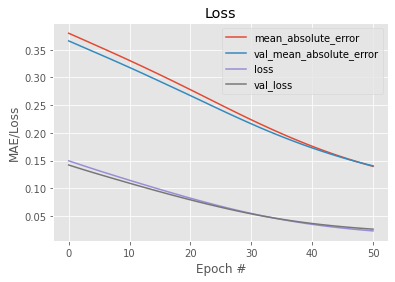

In [78]:
# vamos a probar nuestra red con decay

learning_rate = 0.00053
batch_size = 32
num_epochs = 51
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
#optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
input_shape = [X_train.shape[1]]

model = train_network(num_epochs, batch_size, input_shape, optimizer)
#train_network_1(num_epochs, batch_size, optimizer)


In [79]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Denormalize the predicted values
y_pred_denormalized = target_scaler.inverse_transform(y_pred)

# Denormalize the actual test values
y_test_denormalized = target_scaler.inverse_transform(y_test)

# Compute the mean squared error
mse = mean_squared_error(y_test_denormalized, y_pred_denormalized)

# Print the mean squared error
print("MSE on test set: ", mse)
for i in range (5):
  print("Los valores calculados de Precio son --> ", y_pred_denormalized[i])
  print("Los valores reales de Precio son --> ", y_test_denormalized[i])

8/8 [==============================] - 0s 2ms/step
MSE on test set:  3346.2061820572794
Los valores calculados de Precio son -->  [79.84324]
Los valores reales de Precio son -->  [30.]
Los valores calculados de Precio son -->  [97.724655]
Los valores reales de Precio son -->  [59.]
Los valores calculados de Precio son -->  [100.27305]
Los valores reales de Precio son -->  [90.]
Los valores calculados de Precio son -->  [103.07119]
Los valores reales de Precio son -->  [33.]
Los valores calculados de Precio son -->  [72.39937]
Los valores reales de Precio son -->  [35.]


In [80]:
X_train.shape

(1835, 164)

## 7. Cargo el dataframe de imágenes!

Para ahorrar un poco de tiempo, voy a utilizar únicamente "Picture Url". Sin embargo, creo que la imagen del Host, así como la disponibilidad de las imágenes en distintos tamaños, también podrían afectar el precio. 

In [81]:
columnas_objeto.head(1)

,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host Thumbnail Url,Host Picture Url
0,https://a0.muscache.com/im/pictures/2c7acbab-a...,https://a0.muscache.com/im/pictures/2c7acbab-a...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/2c7acbab-a...,https://a0.muscache.com/im/pictures/ad0ef85b-3...,https://a0.muscache.com/im/pictures/ad0ef85b-3...


In [145]:
X_train_img = pd.read_csv('train.csv')
y_train_img = pd.read_csv('train_target.csv')
Full_train_img = y_train_img.join(X_train_img)
print("El shape del dataframe es --> ", Full_train_img.shape)
Full_train_img.head(1)

El shape del dataframe es -->  (1835, 171)


,Price,ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Zipcode,Latitude,Longitude,Accommodates,...,Bed Type_Airbed,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_flexible,Cancellation Policy_moderate,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,70.0,14299212,87339455,NaN,1.0,1.0,28009,40.407388,-3.676061,4,...,0,0,0,0,1,1,0,0,0,0


In [146]:
print("El total de NAs en X_train es -->", Full_train_img['Thumbnail Url'].isnull().sum())

El total de NAs en X_train es --> 0


In [147]:
# Voy a disminuir a 600 imágenes para poder procesar en menos tiempo las imágenes
Full_train_300 = Full_train_img.sample(n=600, random_state=5)

# creo la carpeta donde guardaré las imágenes
folder_path = "image_folder"
if not os.path.exists(folder_path):
    os.mkdir(folder_path)

image_paths = []
Full_train_filtered = Full_train_300
for i, link in Full_train_300["Thumbnail Url"].iteritems():
    try:
        # trato de bajar las imágenes
        response = urllib.request.urlopen(str(link))
        image_name = f"image_{i}.jpg"
        image_path = os.path.join(folder_path, image_name)
        with open(image_path, "wb") as f:
            f.write(response.read())
        image_paths.append(image_path)
    except Exception as e:
        # Si hay error, me avisa y continúa
        print(f"Error al bajar la URL {link}: {e} --> Lo eliminaré")
        Full_train_filtered.drop(Full_train_filtered[Full_train_filtered['Thumbnail Url'] == link].index, inplace = True) # --> Si encontrara error, lo elimino en Full_train_filtered
        continue  

Full_train_300 = Full_train_filtered
# create a new dataframe with the image paths
image_df = pd.DataFrame({"image_path": image_paths})

# save the dataframe to a CSV file
image_df.to_csv("image_paths.csv", index=False)



Error al bajar la URL https://a0.muscache.com/im/pictures/44363d6b-fc37-4ea9-905e-f181ce1161db.jpg?aki_policy=small: HTTP Error 404: Not Found --> Lo eliminaré
Error al bajar la URL https://a0.muscache.com/im/pictures/ac8d4772-216c-4dce-a94f-181dc4ca3c30.jpg?aki_policy=small: HTTP Error 404: Not Found --> Lo eliminaré
Error al bajar la URL https://a0.muscache.com/im/pictures/d819a540-afde-4a9e-af84-fca7413464f2.jpg?aki_policy=small: HTTP Error 404: Not Found --> Lo eliminaré
Error al bajar la URL https://a0.muscache.com/im/pictures/26ee8fa3-463a-44c3-b86e-b15e54e6219e.jpg?aki_policy=small: HTTP Error 404: Not Found --> Lo eliminaré
Error al bajar la URL https://a0.muscache.com/im/pictures/31c8d18b-04df-4778-b895-06a364db596e.jpg?aki_policy=small: HTTP Error 404: Not Found --> Lo eliminaré
Error al bajar la URL https://a0.muscache.com/im/pictures/6b87d117-8f0e-43ba-b8c8-f84eaca4e3ef.jpg?aki_policy=small: HTTP Error 404: Not Found --> Lo eliminaré
Error al bajar la URL https://a0.muscach

In [148]:
#Voy a validar que las imágenes se bajaron! 

# Mi directorio original es
print("El directorio actual es: {0}".format(os.getcwd()))

# Me he cambiado de directorio al de imágenes
print("El directorio de imágenes es : /content/image_folder y su contenido es este -->")
_, _, files = next(os.walk("/content/image_folder"))
file_count = len(files)
print(file_count)
print("El nuevo shape de Full_train_filtered es --> ", Full_train_filtered.shape)
#files

El directorio actual es: /content
El directorio de imágenes es : /content/image_folder y su contenido es este -->
468
El nuevo shape de Full_train_filtered es -->  (468, 171)


In [ ]:
files

In [140]:
!ls -lh

total 76M
-rw-rw-r-- 1 root root  58M Dec 21 22:29 airbnb-listings-extract.csv
-rw-r--r-- 1 root root  15M Feb 19 19:43 airbnb-listings-extract.zip
drwxr-xr-x 2 root root 4.0K Feb 19 19:43 __MACOSX
drwxr-xr-x 1 root root 4.0K Feb 17 19:30 sample_data
-rw-r--r-- 1 root root 237K Feb 19 19:46 test.csv
-rw-r--r-- 1 root root 1.2K Feb 19 19:46 test_target.csv
-rw-r--r-- 1 root root 1.9M Feb 19 19:46 train.csv
-rw-r--r-- 1 root root 9.2K Feb 19 19:46 train_target.csv
-rw-r--r-- 1 root root 235K Feb 19 19:46 validation.csv
-rw-r--r-- 1 root root 1.2K Feb 19 19:46 validation_target.csv
-rw-r--r-- 1 root root 175K Feb 19 20:04 X_test_img.csv
-rw-r--r-- 1 root root 476K Feb 19 20:00 X_train_img.csv
-rw-r--r-- 1 root root 165K Feb 19 20:02 X_val_img.csv
-rw-r--r-- 1 root root  872 Feb 19 20:04 y_test_img.csv
-rw-r--r-- 1 root root 2.4K Feb 19 20:00 y_train_img.csv
-rw-r--r-- 1 root root  824 Feb 19 20:02 y_val_img.csv


In [141]:
import shutil
os.chdir('/content')
#shutil.rmtree('/content/image_folder/', ignore_errors=True)
#shutil.rmtree('/content/test_image_folder/', ignore_errors=True)
#shutil.rmtree('/content/val_image_folder/', ignore_errors=True)
#os.remove('/content/image_paths.csv')
#os.remove('/content/test_image_paths.csv')
#os.remove('/content/val_image_paths.csv')


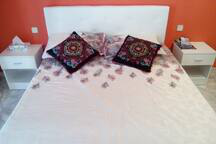

In [91]:
from PIL import Image

image = Image.open('/content/image_folder/image_1508.jpg')
image

### Ahora, voy a preparar la arquitectura de neuronas para relacionar con el precio 

Primero saco X_train, X_val, X_test, y_train, y_val, y_test

In [92]:
# Divido en X_train e y_train
X_train_img = Full_train_filtered.loc[:, Full_train_filtered.columns != 'Price']
X_train_img.to_csv("X_train_img.csv", index=False)
y_train_img = Full_train_filtered['Price']
y_train_img.to_csv("y_train_img.csv", index=False)

print("El shape de X_train_img es --> ", X_train_img.shape)
print("El shape de y_train_img es --> ", y_train_img.shape)

El shape de X_train_img es -->  (468, 170)
El shape de y_train_img es -->  (468,)


In [150]:
# X_val e y_val
X_val_img = pd.read_csv('validation.csv')
y_val_img = pd.read_csv('validation_target.csv')
Full_val_img = y_val_img.join(X_val_img)
print("El shape del dataframe es --> ", Full_val_img.shape)
print("El set completo es Full_val es --> ", Full_val_img.head(1))

# Voy a disminuir a 200 imágenes para poder procesar en menos tiempo las imágenes
Full_val_300 = Full_val_img.sample(n=200, random_state=5)

# creo la carpeta donde guardaré las imágenes
folder_path = "val_image_folder"
if not os.path.exists(folder_path):
    os.mkdir(folder_path)

image_paths = []
Full_val_filtered = Full_val_300
for i, link in Full_val_300["Thumbnail Url"].iteritems():
    try:
        # trato de bajar las imágenes
        response = urllib.request.urlopen(str(link))
        image_name = f"image_{i}.jpg"
        image_path = os.path.join(folder_path, image_name)
        with open(image_path, "wb") as f:
            f.write(response.read())
        image_paths.append(image_path)
    except Exception as e:
        # Si hay error, me avisa y continúa
        print(f"Error al bajar la URL {link}: {e} --> Lo eliminaré")
        Full_val_filtered.drop(Full_val_filtered[Full_val_filtered['Thumbnail Url'] == link].index, inplace = True) # --> Si encontrara error, lo elimino en Full_train_filtered
        continue  

Full_val_300 = Full_val_filtered
# create a new dataframe with the image paths
image_df = pd.DataFrame({"image_path": image_paths})

# guardo los path de imágenes val en CSV
image_df.to_csv("val_image_paths.csv", index=False)

# Divido en X_train e y_train
X_val_img = Full_val_filtered.loc[:, Full_val_filtered.columns != 'Price']
X_val_img.to_csv("X_val_img.csv", index=False)
y_val_img = Full_val_filtered['Price']
y_val_img.to_csv("y_val_img.csv", index=False)

print("El shape de X_val_img es --> ", X_val_img.shape)
print("El shape de y_val_img es --> ", y_val_img.shape)


El shape del dataframe es -->  (229, 171)
El set completo es Full_val es -->     Price       ID   Host ID  Host Response Rate  Host Listings Count  \
0   18.0  9524358  49102155               100.0                  1.0   

   Host Total Listings Count  Zipcode  Latitude  Longitude  Accommodates  ...  \
0                        1.0    28017  40.42637  -3.639243             1  ...   

   Bed Type_Airbed  Bed Type_Couch  Bed Type_Futon  Bed Type_Pull-out Sofa  \
0                0               0               0                       0   

   Bed Type_Real Bed  Cancellation Policy_flexible  \
0                  1                             1   

   Cancellation Policy_moderate  Cancellation Policy_strict  \
0                             0                           0   

   Cancellation Policy_super_strict_30  Cancellation Policy_super_strict_60  
0                                    0                                    0  

[1 rows x 171 columns]
Error al bajar la URL https://a0.muscache

In [151]:
# X_test e y_test
X_test_img = pd.read_csv('test.csv')
y_test_img = pd.read_csv('test_target.csv')
Full_test_img = y_test_img.join(X_test_img)
print("El shape del dataframe es --> ", Full_test_img.shape)
print("El set completo es Full_val es --> ", Full_test_img.head(1))

# Voy a disminuir a 200 imágenes para poder procesar en menos tiempo las imágenes
Full_test_300 = Full_test_img.sample(n=200, random_state=5)

# creo la carpeta donde guardaré las imágenes
folder_path = "test_image_folder"
if not os.path.exists(folder_path):
    os.mkdir(folder_path)

image_paths = []
Full_test_filtered = Full_test_300
for i, link in Full_test_300["Thumbnail Url"].iteritems():
    try:
        # trato de bajar las imágenes
        response = urllib.request.urlopen(str(link))
        image_name = f"image_{i}.jpg"
        image_path = os.path.join(folder_path, image_name)
        with open(image_path, "wb") as f:
            f.write(response.read())
        image_paths.append(image_path)
    except Exception as e:
        # Si hay error, me avisa y continúa
        print(f"Error al bajar la URL {link}: {e} --> Lo eliminaré")
        Full_test_filtered.drop(Full_test_filtered[Full_test_filtered['Thumbnail Url'] == link].index, inplace = True) # --> Si encontrara error, lo elimino en Full_train_filtered
        continue  

Full_test_300 = Full_test_filtered
# create a new dataframe with the image paths
image_df = pd.DataFrame({"image_path": image_paths})

# save the dataframe to a CSV file
image_df.to_csv("test_image_paths.csv", index=False)

# Divido en X_test e y_test
X_test_img = Full_test_filtered.loc[:, Full_test_filtered.columns != 'Price']
X_test_img.to_csv("X_test_img.csv", index=False)
y_test_img = Full_test_filtered['Price']
y_test_img.to_csv("y_test_img.csv", index=False)

print("El shape de X_test_img es --> ", X_test_img.shape)
print("El shape de y_test_img es --> ", y_test_img.shape)

El shape del dataframe es -->  (230, 171)
El set completo es Full_val es -->     Price        ID   Host ID  Host Response Rate  Host Listings Count  \
0   30.0  17842131  53578962               100.0                  1.0   

   Host Total Listings Count  Zipcode   Latitude  Longitude  Accommodates  \
0                        1.0    28015  40.434928  -3.707224             1   

   ...  Bed Type_Airbed  Bed Type_Couch  Bed Type_Futon  \
0  ...                0               0               0   

   Bed Type_Pull-out Sofa  Bed Type_Real Bed  Cancellation Policy_flexible  \
0                       0                  1                             1   

   Cancellation Policy_moderate  Cancellation Policy_strict  \
0                             0                           0   

   Cancellation Policy_super_strict_30  Cancellation Policy_super_strict_60  
0                                    0                                    0  

[1 rows x 171 columns]
Error al bajar la URL https://a0.musc

## 8. Voy a diseñar el modelo para las imágenes

Inicio por cargar los datos del **disco!!!**

Normalizo Precios

In [152]:
!ls -lh

total 76M
-rw-rw-r-- 1 root root  58M Dec 21 22:29 airbnb-listings-extract.csv
-rw-r--r-- 1 root root  15M Feb 19 19:43 airbnb-listings-extract.zip
drwxr-xr-x 2 root root  20K Feb 19 21:24 image_folder
-rw-r--r-- 1 root root  13K Feb 19 21:37 image_paths.csv
drwxr-xr-x 2 root root 4.0K Feb 19 19:43 __MACOSX
drwxr-xr-x 1 root root 4.0K Feb 17 19:30 sample_data
-rw-r--r-- 1 root root 237K Feb 19 19:46 test.csv
drwxr-xr-x 2 root root 4.0K Feb 19 21:40 test_image_folder
-rw-r--r-- 1 root root 5.3K Feb 19 21:40 test_image_paths.csv
-rw-r--r-- 1 root root 1.2K Feb 19 19:46 test_target.csv
-rw-r--r-- 1 root root 1.9M Feb 19 19:46 train.csv
-rw-r--r-- 1 root root 9.2K Feb 19 19:46 train_target.csv
-rw-r--r-- 1 root root 235K Feb 19 19:46 validation.csv
-rw-r--r-- 1 root root 1.2K Feb 19 19:46 validation_target.csv
drwxr-xr-x 2 root root 4.0K Feb 19 21:39 val_image_folder
-rw-r--r-- 1 root root 4.8K Feb 19 21:39 val_image_paths.csv
-rw-r--r-- 1 root root 175K Feb 19 21:40 X_test_img.csv
-rw-r--

In [153]:
target_scaler = MinMaxScaler()

# Carga los path y precios del dataframe para Train
df = pd.read_csv('image_paths.csv')
image_paths_train = df['image_path'].values
precios = pd.read_csv('y_train_img.csv').values

# Carga los path y precios del dataframe para Val
df = pd.read_csv('val_image_paths.csv')
image_paths_val = df['image_path'].values
precios_val = pd.read_csv('y_val_img.csv').values

# Carga los path y precios del dataframe para Test
df = pd.read_csv('test_image_paths.csv')
image_paths_test = df['image_path'].values
precios_test = pd.read_csv('y_test_img.csv').values


# Normalizo los precios 
precios = target_scaler.fit_transform(precios.reshape(-1, 1))
precios_val = target_scaler.fit_transform(precios_val.reshape(-1, 1))
precios_test = target_scaler.fit_transform(precios_test.reshape(-1, 1))



Cargo las imágenes de images

In [156]:
# cargo la imágenes train a memoria
images = []
for path in image_paths_train:
    image = Image.open(path).resize((33, 33)).convert('L')
    image = np.array(image) / 255.0  # normalize pixel values
    images.append(image)
images = np.array(images)


Cargo las imágenes de images_val

In [157]:
# cargo la imágenes validación a memoria
images_val = []
for path in image_paths_val:
    image = Image.open(path).resize((33, 33)).convert('L')
    image = np.array(image) / 255.0  # normalize pixel values
    images_val.append(image)
images_val = np.array(images_val)

In [160]:
def train_network_img(num_epochs, batch_size, optimizer):

  # Defino la arquitectura neuronal 
  image_input = layers.Input(shape=[33,33,1])
  conv1 = layers.Conv2D(256, (3, 3), activation='relu')(image_input)
  conv2 = layers.Conv2D(128, (3, 3), activation='relu')(conv1)
  conv3 = layers.Conv2D(32, (3, 3), activation='relu')(conv2)
  #conv1 = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
  #conv2 = layers.Conv2D(64, (3, 3), activation='relu')(conv1)
  #conv3 = layers.Conv2D(128, (3, 3), activation='relu')(conv2)
  flatten = layers.Flatten()(conv3)
  dense1 = layers.Dense(64, activation='relu')(flatten)
  dense2 = layers.Dense(1, activation='sigmoid')(dense1)

  # Creo el modelo
  image_model = models.Model(inputs=image_input, outputs=dense2)
  image_model.compile(loss='mse', optimizer=optimizer)

  # Entreno el modelo 
  H = image_model.fit(images, precios, validation_data=(images_val, precios_val), epochs=num_epochs, batch_size=batch_size)
  # model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size)



  # Muestro gráfica de accuracy y losses
  plt.style.use("ggplot")
  plt.figure()
  #plt.plot(np.arange(0, num_epochs), H.history["mse"], label="mse")
  #plt.plot(np.arange(0, num_epochs), H.history["val_mse"], label="val_mse")
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  #plt.title("Accuracy")
  plt.title("Loss")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")
  plt.legend()

  return(image_model)


Epoch 1/50
2/2 [==============================] - 28s 16s/step - loss: 0.1397 - val_loss: 0.1633
Epoch 2/50
2/2 [==============================] - 24s 14s/step - loss: 0.1386 - val_loss: 0.1621
Epoch 3/50
2/2 [==============================] - 23s 11s/step - loss: 0.1375 - val_loss: 0.1609
Epoch 4/50
2/2 [==============================] - 27s 13s/step - loss: 0.1365 - val_loss: 0.1597
Epoch 5/50
2/2 [==============================] - 25s 13s/step - loss: 0.1354 - val_loss: 0.1586
Epoch 6/50
2/2 [==============================] - 28s 13s/step - loss: 0.1344 - val_loss: 0.1575
Epoch 7/50
2/2 [==============================] - 29s 15s/step - loss: 0.1334 - val_loss: 0.1563
Epoch 8/50
2/2 [==============================] - 30s 14s/step - loss: 0.1324 - val_loss: 0.1552
Epoch 9/50
2/2 [==============================] - 25s 13s/step - loss: 0.1314 - val_loss: 0.1541
Epoch 10/50
2/2 [==============================] - 22s 12s/step - loss: 0.1303 - val_loss: 0.1530
Epoch 11/50
2/2 [============

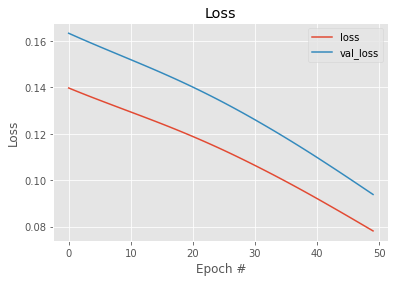

In [161]:
 # vamos a probar nuestra red 

learning_rate = 0.001
batch_size = 256
num_epochs = 50
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
#optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
input_shape = len(images)

image_model = train_network_img(num_epochs, batch_size, optimizer)
#train_network_1(num_epochs, batch_size, optimizer)

Evalúo ahora con test

In [166]:
# cargo la imágenes validación a memoria
images_test = []
for path in image_paths_test:
    image = Image.open(path).resize((33, 33)).convert('L')
    image = np.array(image) / 255.0  # normalize pixel values
    images_test.append(image)
images_test = np.array(images_test)

In [164]:
  # Evaluando el modelo de predicción con las imágenes de test
  print("[INFO]: Evaluando red neuronal...")
  image_model.summary()

[INFO]: Evaluando red neuronal...
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 33, 33, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 31, 31, 256)       2560      
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 29, 128)       295040    
                                                                 
 conv2d_20 (Conv2D)          (None, 27, 27, 32)        36896     
                                                                 
 flatten_6 (Flatten)         (None, 23328)             0         
                                                                 
 dense_17 (Dense)            (None, 64)                1493056   
                                                                 
 dense_18 (Dense)        

In [167]:
# Make predictions on test data
y_pred = image_model.predict(images_test)

# Denormalize the predicted values
y_pred_denormalized = target_scaler.inverse_transform(y_pred)

# Denormalize the actual test values
y_test_img = pd.read_csv('y_test_img.csv')
y_test_denormalized = target_scaler.inverse_transform(y_test_img)

# Compute the mean squared error
mse = mean_squared_error(y_test_denormalized, y_pred_denormalized)

# Print the mean squared error
print("MSE on test set: ", mse)
for i in range (5):
  print("Los valores calculados de Precio son --> ", y_pred_denormalized[i])
  print("Los valores reales de Precio son --> ", y_test_denormalized[i])

6/6 [==============================] - 3s 502ms/step
MSE on test set:  790339563.994222
Los valores calculados de Precio son -->  [153.10184]
Los valores reales de Precio son -->  [11410.]
Los valores calculados de Precio son -->  [156.36725]
Los valores reales de Precio son -->  [66510.]
Los valores calculados de Precio son -->  [147.37415]
Los valores reales de Precio son -->  [19010.]
Los valores calculados de Precio son -->  [167.78091]
Los valores reales de Precio son -->  [6470.]
Los valores calculados de Precio son -->  [153.42091]
Los valores reales de Precio son -->  [14830.]
